Credit Risk Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

import seaborn as sns

KeyboardInterrupt: 

In [21]:
data = pd.read_csv("dataset.csv")
data.head()

,id,Duration in months,Credit history,Purpose of the credit,Credit amount,Status of savings account/bonds,Present employment(years),Installment rate in percentage of disposable income,personal_status,Other debtors / guarantors,...,Property,Age in years,Other installment plans (banks/stores),Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,Foreign worker,Status of existing checking account
0,1,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,2,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,3,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,4,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,5,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [22]:
data.isnull().sum()

id                                                          0
Duration in months                                          0
Credit history                                              0
Purpose of the credit                                       0
Credit amount                                               0
Status of savings account/bonds                             0
Present employment(years)                                   0
Installment rate in percentage of disposable income         0
personal_status                                             0
Other debtors / guarantors                                  0
Present residence since X years                             0
Property                                                    0
Age in years                                                0
Other installment plans (banks/stores)                      0
Housing                                                     0
Number of existing credits at this bank                     0
Job     

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   id                                                        1000 non-null   int64 
 1   Duration in months                                        1000 non-null   int64 
 2   Credit history                                            1000 non-null   object
 3   Purpose of the credit                                     1000 non-null   object
 4   Credit amount                                             1000 non-null   int64 
 5   Status of savings account/bonds                           1000 non-null   object
 6   Present employment(years)                                 1000 non-null   object
 7   Installment rate in percentage of disposable income       1000 non-null   int64 
 8   personal_status              

In [24]:
data.head()

,id,Duration in months,Credit history,Purpose of the credit,Credit amount,Status of savings account/bonds,Present employment(years),Installment rate in percentage of disposable income,personal_status,Other debtors / guarantors,...,Property,Age in years,Other installment plans (banks/stores),Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,Foreign worker,Status of existing checking account
0,1,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,2,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,3,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,4,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,5,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [26]:
categorical_columns = ['Credit history','Purpose of the credit','Status of savings account/bonds','Present employment(years)','personal_status','Other debtors / guarantors','Property','Other installment plans (banks/stores)','Housing','Job','Telephone','Foreign worker','Status of existing checking account']

In [28]:

# Create the OneHotEncoder
# encoder = OneHotEncoder(drop='first', sparse=False)
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Create the ColumnTransformer
ct = ColumnTransformer([("encoder", encoder, categorical_columns)], remainder='passthrough')

# Fit and transform the data
encoded_array = ct.fit_transform(data)

# Create a new DataFrame with encoded variables
encoded_df = pd.DataFrame(encoded_array, columns=ct.get_feature_names_out())

In [29]:
encoded_df.head()

,encoder__Credit history_critical/other existing credit,encoder__Credit history_delayed previously,encoder__Credit history_existing paid,encoder__Credit history_no credits/all paid,encoder__Purpose of the credit_domestic appliance,encoder__Purpose of the credit_education,encoder__Purpose of the credit_furniture/equipment,encoder__Purpose of the credit_new car,encoder__Purpose of the credit_other,encoder__Purpose of the credit_radio/tv,...,encoder__Foreign worker_yes,encoder__Status of existing checking account_good,remainder__id,remainder__Duration in months,remainder__Credit amount,remainder__Installment rate in percentage of disposable income,remainder__Present residence since X years,remainder__Age in years,remainder__Number of existing credits at this bank,remainder__Number of people being liable to provide maintenance for
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,6.0,1169.0,4.0,4.0,67.0,2.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,48.0,5951.0,2.0,2.0,22.0,1.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,3.0,12.0,2096.0,2.0,3.0,49.0,1.0,2.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,4.0,42.0,7882.0,2.0,4.0,45.0,1.0,2.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,5.0,24.0,4870.0,3.0,4.0,53.0,2.0,2.0


In [30]:
# encoded_df.to_csv("encode_data.csv")

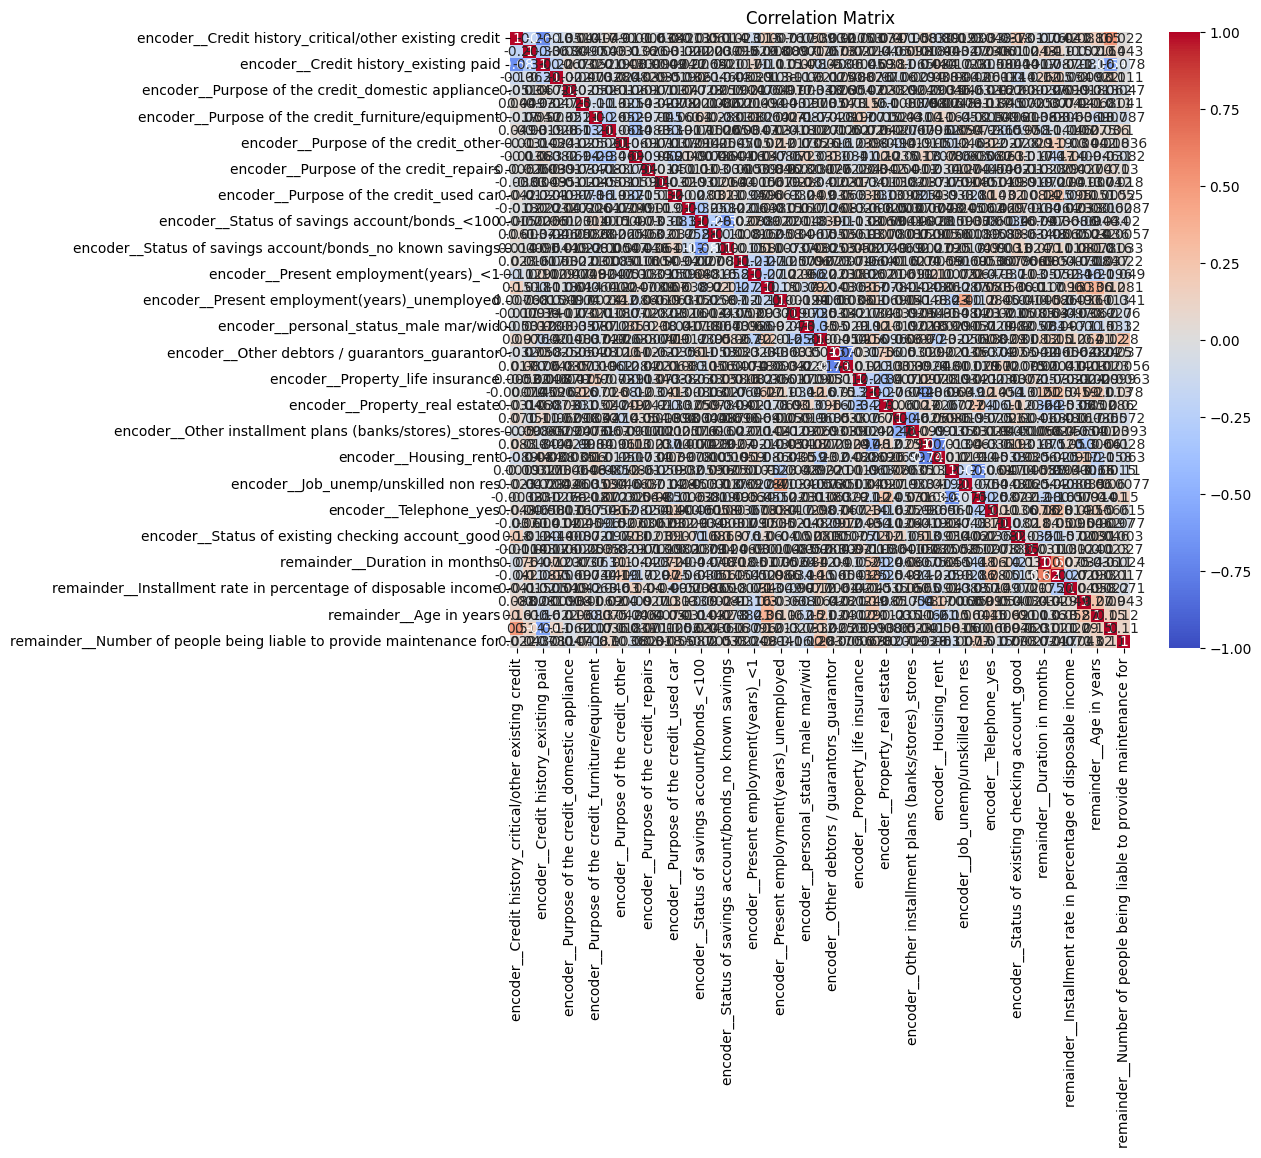

                                                    encoder__Credit history_critical/other existing credit  \
encoder__Credit history_critical/other existing...                                           1.000000        
encoder__Credit history_delayed previously                                                  -0.199971        
encoder__Credit history_existing paid                                                       -0.683617        
encoder__Credit history_no credits/all paid                                                 -0.131407        
encoder__Purpose of the credit_domestic appliance                                           -0.050769        
encoder__Purpose of the credit_education                                                     0.043853        
encoder__Purpose of the credit_furniture/equipment                                          -0.017308        
encoder__Purpose of the credit_new car                                                       0.048979        
encoder__P

In [32]:
# Calculate the correlation matrix
corr_matrix = encoded_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix')
plt.show()

# If you want to see the numerical values, you can print the correlation matrix
print(corr_matrix)

In [35]:
X = encoded_df.drop('encoder__Status of existing checking account_good', axis=1)
y = encoded_df['encoder__Status of existing checking account_good']

              precision    recall  f1-score   support

         0.0       0.67      0.44      0.53        59
         1.0       0.80      0.91      0.85       141

    accuracy                           0.77       200
   macro avg       0.73      0.67      0.69       200
weighted avg       0.76      0.77      0.75       200


Confusion Matrix:
[[ 26  33]
 [ 13 128]]


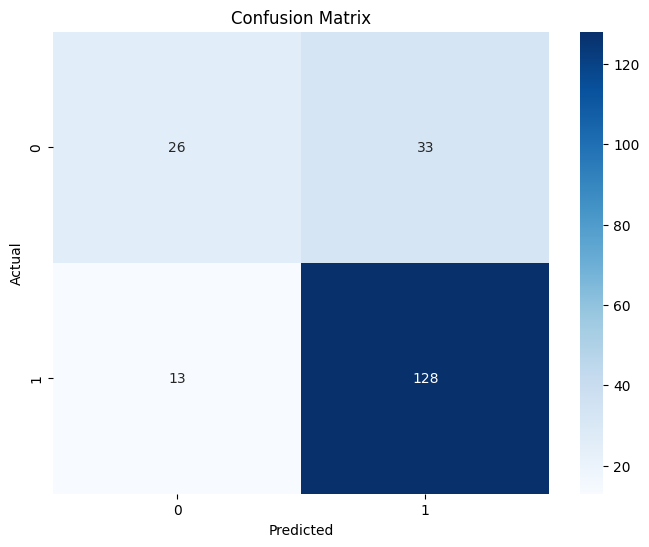


Feature Importance:
                                              Feature  Coefficient
0   encoder__Credit history_critical/other existin...     0.790804
2               encoder__Credit history_existing paid     0.373653
1          encoder__Credit history_delayed previously     0.353615
43                            remainder__Age in years     0.351944
41  remainder__Installment rate in percentage of d...    -0.351602
40                           remainder__Credit amount    -0.337694
7              encoder__Purpose of the credit_new car    -0.330693
39                      remainder__Duration in months    -0.293172
12            encoder__Purpose of the credit_used car     0.272031
23               encoder__personal_status_male single     0.246653
29  encoder__Other installment plans (banks/stores...     0.233738
37                        encoder__Foreign worker_yes    -0.216028
16  encoder__Status of savings account/bonds_no kn...     0.214699
5            encoder__Purpose of the cred

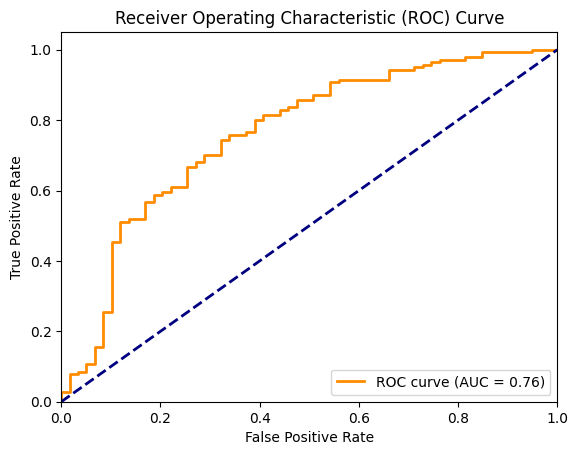

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Create and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Step 5: Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# # Calculate accuracy
# accuracy = (encoded_df['encoder__Status of existing checking account_good'] == encoded_df['predicted_result']).mean()
# print(f"Accuracy: {accuracy:.2f}")


# Step 6: Evaluate the model
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Step 7: Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Step 8: Print feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
feature_importance = feature_importance.sort_values('Coefficient', key=abs, ascending=False)
print("\nFeature Importance:")
print(feature_importance)

# Optional: ROC Curve
from sklearn.metrics import roc_curve, auc
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [37]:
encoded_df_predicted = encoded_df

In [38]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Assuming your dataframe is called 'df'
# Separate features (X) and target variable (y)
X = encoded_df_predicted.drop('encoder__Status of existing checking account_good', axis=1)
y = encoded_df_predicted['encoder__Status of existing checking account_good']

# Create and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X, y)

# Make predictions on the entire dataset
predictions = model.predict(X)

# Add predictions as a new column to the dataframe
encoded_df_predicted['predicted_result'] = predictions

# Display the first few rows of the updated dataframe
print(encoded_df_predicted[['encoder__Status of existing checking account_good', 'predicted_result']].head())

# Calculate accuracy
accuracy = (encoded_df_predicted['encoder__Status of existing checking account_good'] == encoded_df_predicted['predicted_result']).mean()
print(f"Accuracy: {accuracy:.2f}")


   encoder__Status of existing checking account_good  predicted_result
0                                                1.0               1.0
1                                                0.0               1.0
2                                                1.0               1.0
3                                                1.0               1.0
4                                                0.0               1.0
Accuracy: 0.74


c:\Users\niran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
# encoded_df_predicted.to_csv('predicted.csv')